In [75]:
#Name:Sapna Bharti
#1Problem Statement – 
#Use machine learning to create a model that predicts whether a person makes over 50K a year.

import numpy as np 
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline

In [76]:
read_file = pd.read_excel ("train.xlsx")

read_file.to_csv ("train.csv", 
                  index = None,
                  header=True)

df = pd.DataFrame(pd.read_csv("train.csv",header=None, na_values=' '))
  
df.columns=['age','workclass','fnlwgt','education','education-num',
           'marital-status','occupation','relationship','race',
           'sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [77]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [78]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [79]:
len(df.columns)

15

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [81]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [82]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

<Figure size 720x432 with 0 Axes>

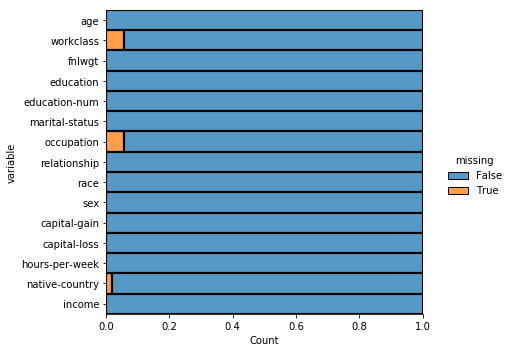

In [83]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)


In [110]:
print(f"workclass : {round(2093 / 32561 , 4) *100}%")
print(f"occupation : {round(1843 / 32561 , 4) *100}%")
print(f"native-country : {round(583 / 32561 , 4) *100}%")

workclass : 6.43%
occupation : 5.66%
native-country : 1.79%


In [84]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [85]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [86]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [87]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

In [88]:
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [89]:
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [90]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

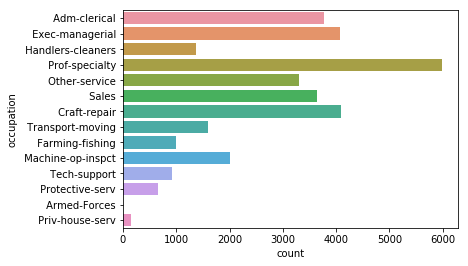

In [91]:
sns.countplot(y=df['occupation'])

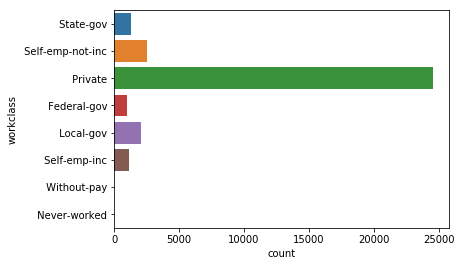

In [92]:
sns.countplot(y=df['workclass'])

c:\users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


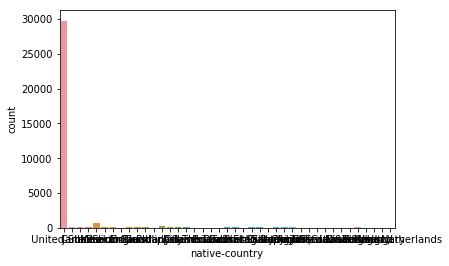

In [93]:
sns.countplot(df['native-country'])

c:\users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


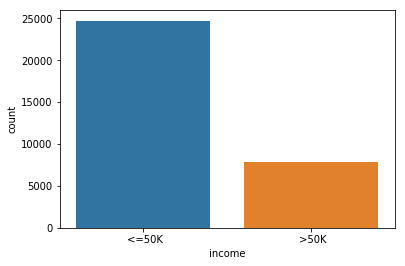

In [94]:
sns.countplot(df['income'])

In [95]:
df["income"].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [98]:
print(f"<=50k:{round(24720/32561*100,2)}")
print(f">50k:{round(7841/32561*100,2)}")

<=50k:75.92
>50k:24.08


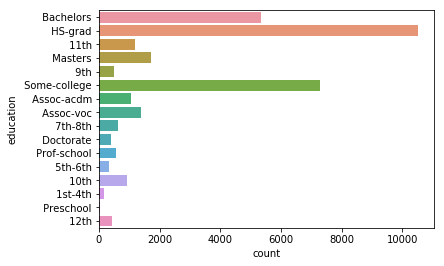

In [99]:
sns.countplot(y=df['education'])

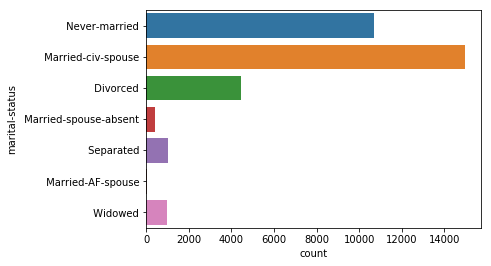

In [100]:
sns.countplot(y=df['marital-status'])

In [22]:
numerical = [i for i in df.columns if df[i].dtypes != "O"]

In [101]:
numerical

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [105]:
for i in numerical:
    print(f"{i} : {len(df[i].unique())}")

age : 73
fnlwgt : 21648
education-num : 16
capital-gain : 119
capital-loss : 92
hours-per-week : 94


In [106]:
df["education-num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

c:\users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\dell\anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarn

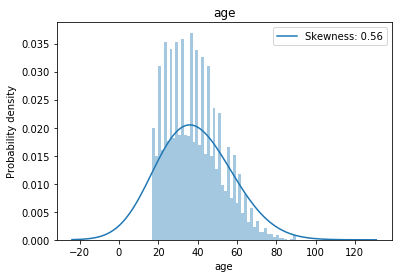

c:\users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\dell\anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarn

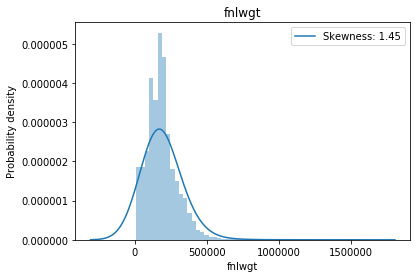

c:\users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\dell\anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarn

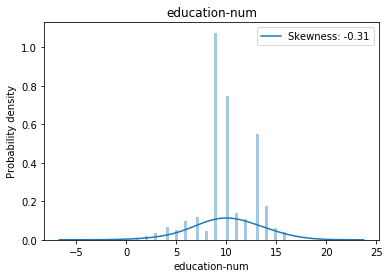

c:\users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\dell\anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarn

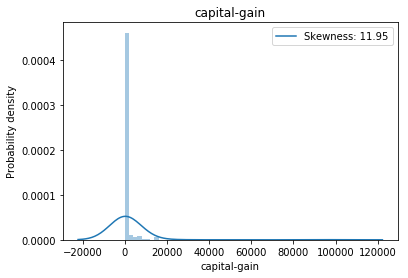

c:\users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\dell\anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarn

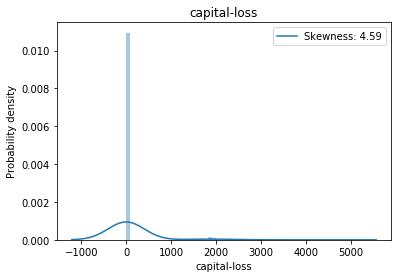

c:\users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\dell\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\dell\anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarn

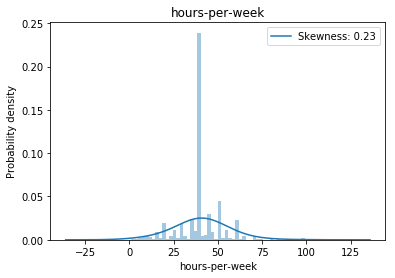

In [24]:
for feature in numerical:
    bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
    bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

In [25]:
df["age"] = np.log(df["age"])
df["fnlwgt"] = np.log(df["fnlwgt"])

In [107]:
categorical = [i for i in df.columns if df[i].dtypes == "O"]

In [108]:
categorical 

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [109]:
for i in categorical:
    print(f"{i} : {len(df[i].unique())}")

workclass : 8
education : 16
marital-status : 7
occupation : 14
relationship : 6
race : 5
sex : 2
native-country : 41
income : 2


In [28]:
for feature in  categorical:
    print(df[feature].value_counts()) 
    print("\n \n ")

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 
 
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

 
 
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 

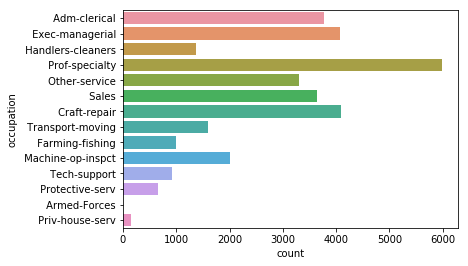

In [111]:
sns.countplot(y=df['occupation'])

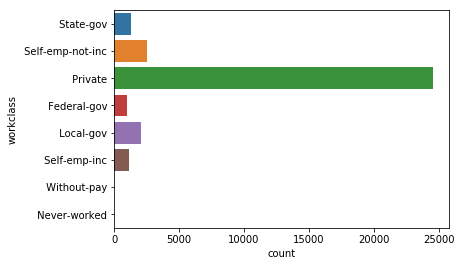

In [112]:
sns.countplot(y=df['workclass'])

In [113]:
# education Category
df["education"].replace(['1st-4th','5th-6th','7th-8th'], 'school' ,
                         inplace = True , regex = True)
df["education"].replace(['HS-grad','11th','10th','9th','12th'], 'higher' , inplace = True , regex = True)

In [114]:

df['education'].value_counts()

 higher          13556
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 school           1147
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
 Preschool          51
Name: education, dtype: int64

In [115]:
#martial status
df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)
df['marital-status'].value_counts()

 married          14999
 Never-married    10683
 other             6879
Name: marital-status, dtype: int64

In [117]:
#workclass
df['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'], 'self_employed' , inplace = True , regex = True)
df['workclass'].replace(['Local-gov','State-gov','Federal-gov'], 'govt_employees' , inplace = True , regex = True)
df['workclass'].value_counts()

 Private           24532
 govt_employees     4351
 self_employed      3657
 Without-pay          14
 Never-worked          7
Name: workclass, dtype: int64

In [118]:
# income

df['income'] = df['income'].replace({'<=50K.'}, '0', regex=True)
df['income'] = df['income'].replace({'>50K.'}, '1', regex=True)
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [60]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.261160,govt_employees,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,0.310462,self_employed,83311,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,0.255665,Private,215646,hs_grad,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,0.321242,Private,234721,hs_grad,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,0.185345,Private,338409,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [124]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  5
 education  :  10
 marital-status  :  3
 occupation  :  14
 relationship  :  6
 race  :  5
 sex  :  2
 native-country  :  41
 income  :  2


In [125]:
df["education"].unique()

array([' Bachelors', ' higher', ' Masters', ' Some-college',
       ' Assoc-acdm', ' Assoc-voc', ' school', ' Doctorate',
       ' Prof-school', ' Preschool'], dtype=object)

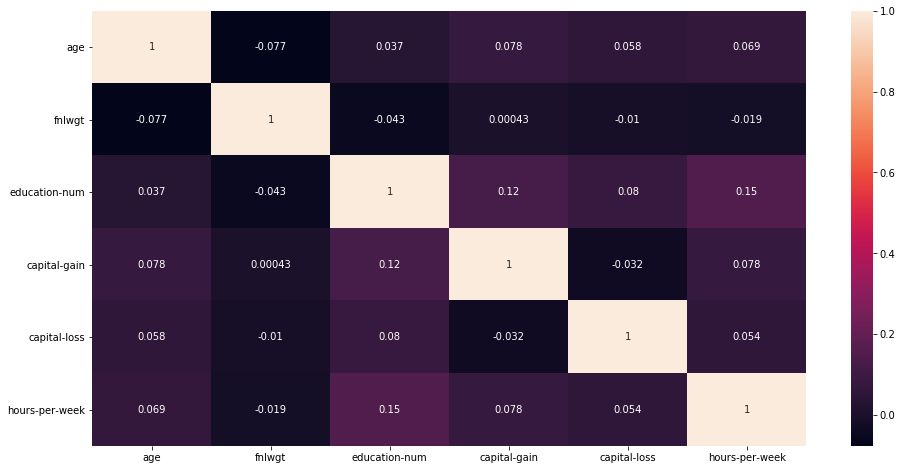

In [126]:
#coorelation matrix
plt.figure(figsize = (16 , 8))
sns.heatmap(df.corr(), annot=True);

In [127]:
from sklearn.preprocessing import  LabelEncoder

In [128]:
df = df.apply(LabelEncoder().fit_transform)
df .head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,3,2671,2,12,0,0,1,4,1,25,0,39,38,0
1,33,4,2926,2,12,1,3,0,4,1,0,0,12,38,0
2,21,1,14086,8,8,2,5,1,4,1,0,0,39,38,0
3,36,1,15336,8,6,1,5,0,2,1,0,0,39,38,0
4,11,1,19355,2,12,1,9,5,2,0,0,0,39,4,0


In [129]:
#sns.pairplot(df ,  height=10 ) ## Multivariate analysis
X_train = df.iloc[:,:-1]
y_train = df["income"]

In [130]:
read_file = pd.read_excel ("test.xlsx")

read_file.to_csv ("test.csv", 
                  index = None,
                  header=True)

df_test= pd.DataFrame(pd.read_csv("test.csv",header=None, na_values=' '))
  
df_test.columns=['age','workclass','fnlwgt','education','education-num',
           'marital-status','occupation','relationship','race',
           'sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [131]:
## apply log on skewed data
df_test["age"] = np.log(df_test["age"])
df_test["fnlwgt"] = np.log(df_test["fnlwgt"])



# education Category
df_test["education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df_test["education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

#martial status
df_test['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df_test['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)


# income
df_test["income"] = df_test["income"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

df_test = df_test.apply(LabelEncoder().fit_transform)

In [132]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,4,8931,5,6,0,6,3,2,1,0,1,39,38,0
1,21,4,1888,2,8,1,4,0,4,1,0,0,49,38,0
2,11,1,11540,4,11,1,11,0,4,1,0,0,39,38,1
3,27,4,5146,4,9,1,6,0,2,1,90,0,39,38,1
4,1,2,2450,4,9,0,7,3,4,0,0,0,29,38,0


In [133]:
df_test.shape

(16281, 15)

In [134]:
X_test = df_test.iloc[:,:-1] #taking independent variable
y_test = df_test["income"] #dependent variable

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #applied std scaler on both 
X_test = sc.transform(X_test)

In [136]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [140]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
accuracy_score(y_test, prediction)

0.7688102696394571

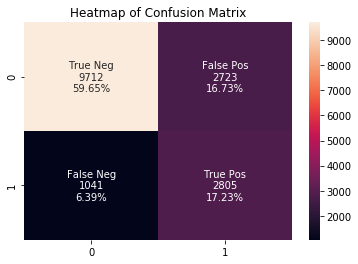

In [141]:
cm = confusion_matrix(y_test, prediction )
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages=["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels ,  fmt = '')

plt.show()

In [142]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.90      0.78      0.84     12435
          1       0.51      0.73      0.60      3846

avg / total       0.81      0.77      0.78     16281



In [143]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8484736809778269

In [144]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.95      0.91     12435
          1       0.77      0.51      0.61      3846

avg / total       0.84      0.85      0.84     16281



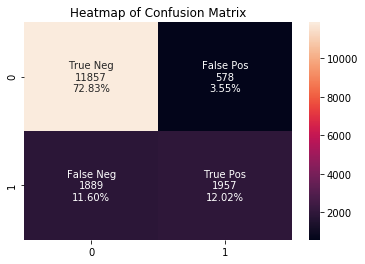

In [146]:
cm = confusion_matrix(y_test, y_pred )
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages=["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels ,  fmt = '')

plt.show()

In [147]:
params={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':[1,2,3],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf': [1,2,3,4],
              }

In [148]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3 ,random_state = 23)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\users\dell\anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   52.9s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=51, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [3, 5, 10, None], 'n_estimators': [10, 100, 200, 300, 400, 500], 'max_features': [1, 2, 3], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=23, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [149]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 2,
 'n_estimators': 200}

In [150]:
rf_classifier = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=10, max_features=3,
                       min_samples_leaf=2, n_estimators=200, random_state=51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7809102634973282

In [151]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.75      0.84     12435
          1       0.52      0.89      0.66      3846

avg / total       0.85      0.78      0.80     16281



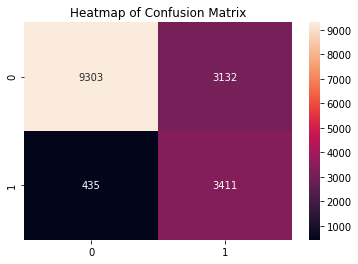

In [152]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

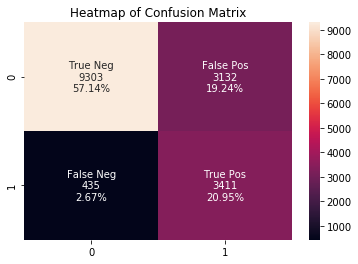

In [153]:
cm = confusion_matrix(y_test, y_pred )
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages=["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels ,  fmt = '')

plt.show()